<img src="images\Logo_UCLL_ENG_RGB.png" style="background-color:white;" />

# Data & Artificial Intelligence

Lecturers: Aimée Lynn Backiel, Chidi Nweke

Academic year 2022-2023

## Chapter 1: introduction to the data science cycle

### Practical information


There are several technologies and programming languages that can be used for data science and AI. The image below is an overview of canonical packages used in this domain. The practical part of the course and the assignments will be done through jupyter notebooks. Jupyter stands for Julia, Python and R, the three main programming languages that are used. In this course we will focus on Python and a subset of relevant packages used in data science and AI. 

<center><img src="images\9rnujgv697bmk2jq3yip.png"></center>

### Installing Python



In order to use Python and the notebooks we recommend you to either:

**Using a text editor or IDE:**
1. [Install Python through Anaconda](https://www.anaconda.com/products/distribution)
2.  Install a text editor or IDE that has support for notebooks such as [visual studio code](https://code.visualstudio.com/download) or [juptyer lab](https://jupyter.org/install)
3.  For Visual studio code: [install the python plug-in](https://marketplace.visualstudio.com/items?itemName=ms-python.python) 

**Using Colab (easier):**
1. Unzip the folder.
2. upload the folder to your personal Google Drive. 
3. Open the .ipynb file in Google Drive. 
4. Add the following snippet to the top of the notebook:
```python
from google.colab import drive
drive.mount('/content/drive')
```
5. Add this line of code to make the folder where the .ipynb file is your working directory  ```%cd /content/drive/My\ Drive/YOUR FOLDER NAMES HERE``` 

For the assignments we recommend using git, when we release the instructions we will provide clear instructions on how to use git with both Visual Studio Code and Google Colab.

**Most importantly: Don't be ashamed to let us know if you're having trouble getting it to work. You're definitely not the only person struggling with this. Try this as soon as possible after the first lecture and let us know if you're stuck.**

### CRISP-DM and the data science process

As mentioned in the slides a key idea in this course will be the data science process outlined in CRISP-DM below. In this first practical session we'll walk you through the entire process in a basic example. It is not important yet that you understand all the details yet as these topics will be discussed at length in the coming weeks.

<center><img src="images/CRISP-DM.png" style="background-color:white; max-width:50%"/></center>

### Our first case study: The Titanic



Late in the evening of the 14th of April 1912 a ship on its way from Southampton to London called the Titanic collided with an Iceberg and tragically crashed.  You, being interested in data & AI, realise you can use this information to figure out who is likely to survive.

You have access to the following variables:

<blockquote> 

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

</blockquote> 


<blockquote> 

#### ❓ How would you solve this with or without AI?

</blockquote>

### Business understanding


Typically CRISP-DM organises each phase into a set of tasks that need to be carried out. For business understanding these are:


1. Identifying your business goals: what do we want to achieve. These are broad goals beyond data & AI
2. Assessing your situation: What resources do we have (data, experts, hardware, software, ...), requirements, constraints, risks, ...
3. Defining your data-mining goals: How do we specifically want to achieve these with data & AI and what are our deliverables
4. Formulating a project plan

Points 2 and 4 are typically covered in other courses. The most interesting ones for us are 1 and 3, defining the goals. Specifically for our case study we could have two goals: understanding what contributes to someone surviving the crash or simply predicting who will survive. 

### Data understanding

The next phase consists of four tasks. 

1. Gathering data
2. Describing data
3. Exploring data
4. Verifying data quality 

##### 💻📊 We will tackle all of them together using Python's pandas package. Typically it is imported as ```import pandas as pd```. 


In [1]:
import pandas as pd # Common convention

titanic_df = pd.read_csv('data/train.csv')
titanic_df.head() # Top 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 💡 This phase is all about exploring and asking the right questions to understand the data. The more experience you get with data & AI the easier it becomes to formulate these. In the course we will give you a number of standard questions you can ask.

<blockquote> 

**Q1:** How much data do I have?

**Q2:** There are a few missing values in the Cabin column. How big of a problem is this?  (Typically machine learning algorithms can not deal with null values)

**Q3:** How many people survived in this dataset?

**Q4:** Are the tickets names standardised? What do they mean? **(Do by yourself)**

</blockquote> 


In [2]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
titanic_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Only 204 values in the Age column and 714 in the cabin column. In later lectures we will discuss how we can deal with missing values better but for now we will just not include this in our final model.

<blockquote> 

#### ❓ Before we start analying the data: do you think all of these variables are relevant to predict who does or does not survive? Which would you remove?

</blockquote> 

##### 💻📊 To describe the data looking at summary statistics, Pandas has a ```describe()``` method that can be used for this. To count summary statistics in a group you can use the following methods ```.groupby("yourGroup").summaryStatistic()``` 

In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_df.groupby(["Survived", "Pclass"]).size() #Or use .count() instead of .size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [6]:
titanic_df.groupby(["Survived"]).mean()["Age"] # ["Age"] means that only the mean of the Age column is shown.

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

<blockquote> 

#### 📚 Homework question 1: Investigate the other variables. Do you see any variables that help you decide who lives and who does not? Hint: try grouping on multiple variables as well.

</blockquote> 

<blockquote> 

#### ❓ Harder question: What are we missing in the analysis so far? Why would visualisation be able to help us?

</blockquote> 

#####  To gain more understanding in the data and/or to present your preliminary results to people that do not have a background in data & AI visualisations can help. We will use ```matplotlib``` and ```seaborn``` import them respectively as ```import matplotlib.pyplot as plt``` and ```import seaborn as sns```. 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

For now, don't worry about the syntax of the plot. We will cover that in later lectures.

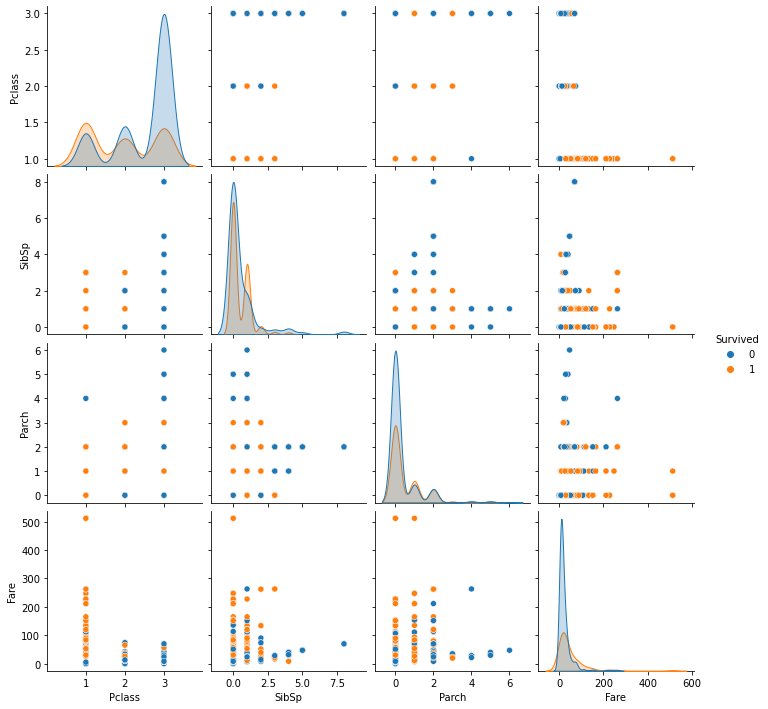

In [8]:
sns.pairplot(titanic_df[["Survived", "Pclass","SibSp", "Parch", "Fare", "Embarked"]], hue="Survived") 


💡💻📊  Notice how there are two square brackets around titanic_df. You can access a column with ```dataFrame["columnName"]```. If you want to access multiple columns you need to pass in a list like: ```dataFrame[ListOfColumns].```

<blockquote> 

##### ❓ What insights can we get from the pairplot?

</blockquote> 

Looking at how correlated variables are with each other and with what we want to predict can be helpful.

💡 Reminder: correlation is how related two variables are. A correlation of 1(-1) means that if variable A increases then B increases(decreases).

In future lectures we will investigate common pitfalls with correlation and how to interpret them in a data science context.

<AxesSubplot:>

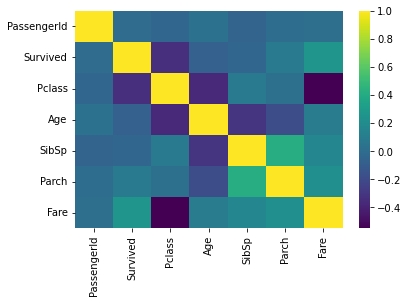

In [9]:
sns.heatmap(titanic_df.corr(), cmap="viridis")

<blockquote> 

##### ❓ What insights can we get from the heatmap?

</blockquote> 

There are many more insights you could get from looking at this plot. I recommend you to do this later on and see what more information you could get out of it.

<blockquote> 

**Insight 1:** The largest group of survivors were in first class.

**Insight 2:** People with a higher fair seem to survive at a higher rate.

**Insight 3:** Having a large number of siblings and parents aboard (4 +) lowers the survival rate.

</blockquote> 

<blockquote> 

#### 📚 Homework question 2: Try and get additional insights from the two plots and the extra variables you investigated in the previous question.

</blockquote> 

### Data preparation

This is a comparatively large step that can make or break a data project. It is comprised of five steps namely:

1. Selecting data: What portion (e.g. tables, columns) will we use?
2. Cleaning data: Are there errors, null values, ... we need to deal with first?
3. Constructing data: Can we derive new attributes (usually called "features") from the data?
4. Integrating data: Bringing the data together from different places.
5. Formatting data: Preserving the data in a format that is easy to use?


The Titanic case is a beginner level project so this does not play a big role here. In the real world and advanced level practice cases this is the deciding factor.

Step 3 can still be applied here. For example:
* The name variable contains the person's title. Married men and women might have different survival rates.
*  We could fill in the cabin name by looking at the ticket class. 
*  Do you have any more suggestions?

The first assignment you will do in the course will focus on this step. 

<blockquote> 

#### ❓ Are we ready to apply a machine learning model? 

</blockquote> 


### Modelling

1. Selecting modeling techniques: What algorithms will we test?
2. Designing tests: How do we test how well our model works?
3. Building the models: We train the selected models
4. Assessing the models: Models can be assessed from a technical point of view (how well do they perform, how fast are they, how scalable are they) but also from a business standpoint (does the output make sense).

❗ There are a lot of different machine learning algorithms out there. The goal of this course is not to discuss them one by one as was done in Business Analytics minor but rather to view this step as one step in an entire process. Not everyone has taken BA minor as we have both have students following from Limburg and abroad.

In later lectures we provide you with tricks on how to select the right algorithm(s) for the right task without knowing the finer details of each of them. 

Students following the 4 ECTS version of this course have 2 tests, one on Python for data science and a second one on AI algorithms. Students from the 6 ECTS version of the course can use this to brush up on their knowledge but are not required to.

#### 💻🤖 ```Sci-kit learn``` is the main machine learning package we will be using. It contains most popular algorithms together with other things from the wider data science toolbox such as model evaluation and data preparation. A key feature of sci-kit learn are Pipelines. 

##### 💻🤖 The ```Pipeline``` class allows you to chain multiple steps after each other. This enables you to carry out transformations of your data (data preparation step in CRISP-DM) and modeling at the same time. Another advantage is that this enables you to deploy, monitor and version control your machine learning models in a correct way. Time permitting, We will discuss this at more length in the end of the course. 

💡 Machine learning models can only take numeric input. We need to transform the textual variables to so-called onehot encoded variables. The image below is an intuitive explanation

<center> <img src="images\1_ggtP4a5YaRx6l09KQaYOnw.png"></center>



💡 A second transformation we need to do is ensure the data is on the same scale. Otherwise one variable will have more weight to the machine learning model. 

<center> <img src="images\standard scaling.png"></center>


💡 Finally, we impute (fill in the blanks) of the missing values with their mean. 
<center> <img src="images\mean imputation.png"></center>


**These techniques will be discussed at length in the classes that correspond to the respective steps in the CRISP-DM process. Don't worry if they seem arbitrary right now.**

<blockquote> 

##### ❓ What techniques would you apply to what variables? 

</blockquote> 

<blockquote> 

#### 📚 Optional homework:

These are open ended, you do not need to complete these (by the next lecture). They are rather for students that want to work more ahead of time or need to refresh some concepts. **Most of these will be covered in later lectures.**

1. For those not familiar with Python or want a comprehensive refresher: Read chapter 3, 4, 5 in "A Beginners Guide to Python 3 Programming" (Check Toledo on how to get free access).
2. 💡 **Especially for international students and students Limburg**: Read chapter 1 of "Python Data Analytics".
3. For those that know SQL well and want to get started with Pandas with a short guide: https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html
4. 10 minute introduction to Pandas: https://pandas.pydata.org/docs/user_guide/10min.html 
5. Introduction to Seaborn: https://seaborn.pydata.org/tutorial/introduction.html
6. For those with a lot of time left: Chapter 2 and 3 of "Python Data Analytics" 

</blockquote> 

<br>
